In [0]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import pandas as pd
from matplotlib.widgets import Slider

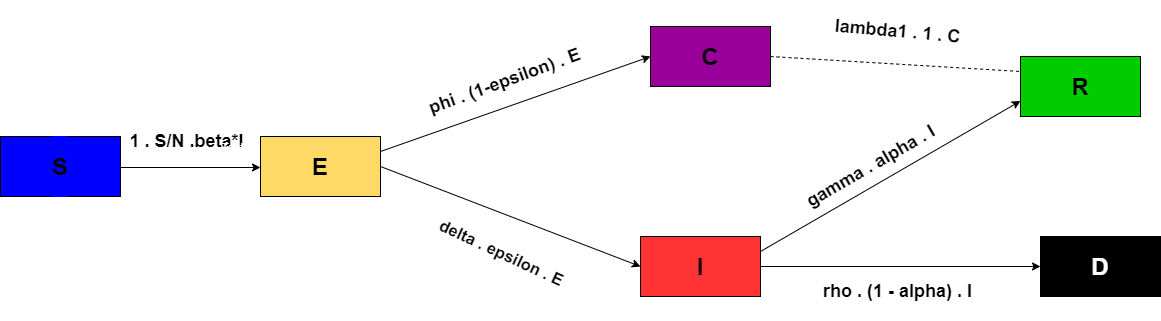

In [11]:
Image(filename='/content/SECIRD (1).png')

In [0]:
def deriv(y, t, N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1):
    S, E, C, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * epsilon * E - phi * (1 - epsilon) * E
    dCdt = phi * (1 - epsilon) * E - lambda1 * C 
    dIdt = delta * epsilon * E - alpha * gamma * I - rho * (1-alpha) * I
    dRdt = lambda1 * C + alpha * gamma * I
    dDdt = rho * (1- alpha) * I
    return dSdt, dEdt, dCdt, dIdt, dRdt, dDdt

In [0]:
a = pd.read_csv('/content/us.csv')
a = a.iloc[54:,:]
xl_sheet_variation1 = pd.DataFrame(columns = ['N', 'beta', 'delta', 'phi', 'epsilon', 'gamma', 'alpha', 'rho', 'lambda1','R_0','S0', 'E0', 'C0', 'I0', 'R0', 'D0','S', 'E', 'C', 'I', 'R', 'D','actual values','predicted values'])
xl_sheet_variation2 = pd.DataFrame(columns = ['N', 'beta', 'delta', 'phi', 'epsilon', 'gamma', 'alpha', 'rho', 'lambda1','omega','R_0', 'S0', 'E0', 'C0', 'I0', 'R0', 'D0','S', 'E', 'C', 'I', 'R', 'D','actual value','predicted value'])

In [0]:
us_data = a.drop(columns='date')

In [15]:
us_data['cases'].shape[0]   #.iloc[0,0]

32

In [0]:
N = 10000000
D = 14.0                # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 4.0    # incubation period of five days
epsilon = 0.90 
R_0 = 5.8
beta = R_0 * gamma      # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.9             # 10% death rate
rho = 1.0 / 9.0              # 9 days from infection until death
phi = 1.0 / 8.0         # 5 days approx carrier period before recovery
lambda1 = 1.0 / 7.0    # 7 days approx death period taken after infection
S0, E0, C0, I0, R0, D0 = N-us_data.iloc[0,0]-10000-5000 , 10000, 5000, us_data.iloc[0,0], 0, us_data.iloc[0,1]    # initial conditions: one exposed

In [0]:
m = [N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1, R_0]
t = np.linspace(15, 46 , 32)       # Grid of time points (in days)
y0 = [S0, E0, C0, I0, R0, D0]      # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1))
S, E, C, I, R, D = ret.T


n = [S[-1], E[-1], C[-1], I[-1], R[-1], D[-1]]

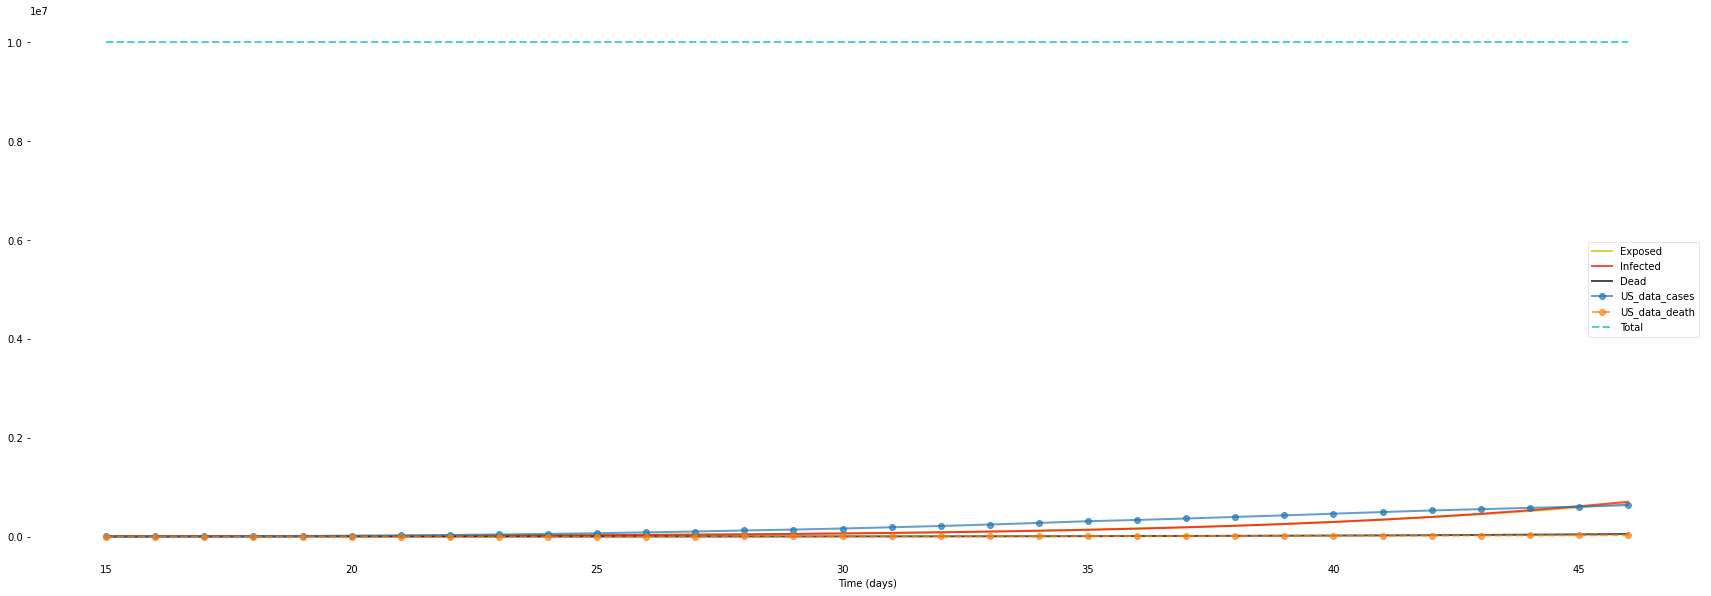

In [233]:
  f, ax = plt.subplots(1,1,figsize=(30,10))
  #ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  #ax.plot(t, C, 'darkmagenta', alpha=0.7, linewidth=2, label='Carrier')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  #ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax.plot(t[0:us_data.shape[0]], us_data['cases'], 'o-', alpha=0.7, linewidth=2, label='US_data_cases')
  ax.plot(t[0:us_data.shape[0]], us_data['deaths'], 'o--', alpha=0.7, linewidth=2, label='US_data_death')

  ax.plot(t, S+E+C+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')

  #ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [234]:
I[-1]

704604.2063478084

In [0]:
a1 = m + y0 + n + [us_data.iloc[-1,0]] + [I[-1]]

b1 = pd.Series(a1, index = xl_sheet_variation1.columns)
xl_sheet_variation1 = xl_sheet_variation1.append(b1,ignore_index=True)
xl_sheet_variation1.to_excel('/content/xl_sheet_variation1.xlsx',sheet_name='USA',index = False)

In [236]:
xl_sheet_variation1

,N,beta,delta,phi,epsilon,gamma,alpha,rho,lambda1,R_0,S0,E0,C0,I0,R0,D0,S,E,C,I,R,D,actual values,predicted values
0,10000000.0,0.400000,0.200000,0.200000,0.9,0.040000,0.9,0.200000,0.142857,10.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.644035e+06,5.514621e+05,39990.725676,518517.078464,174068.023139,71994.929519,636776.0,518517.078464
1,10000000.0,0.240000,0.200000,0.200000,0.9,0.040000,0.9,0.200000,0.142857,6.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,9.714950e+06,8.861012e+04,7695.164215,109522.001507,56675.001614,22615.867945,636776.0,109522.001507
2,10000000.0,0.240000,0.071429,0.200000,0.9,0.040000,0.9,0.200000,0.142857,6.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,9.893820e+06,4.271527e+04,4391.775461,24882.321261,26846.611527,7412.217278,636776.0,24882.321261
3,10000000.0,0.400000,0.200000,0.200000,0.9,0.040000,0.9,0.200000,0.142857,10.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.644035e+06,5.514621e+05,39990.725676,518517.078464,174068.023139,71994.929519,636776.0,518517.078464
4,10000000.0,0.500000,0.200000,0.200000,0.9,0.050000,0.9,0.200000,0.142857,10.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,7.401850e+06,1.102025e+06,78213.316158,953680.965724,344633.267934,119665.374089,636776.0,953680.965724
5,10000000.0,0.300000,0.200000,0.200000,0.9,0.050000,0.9,0.200000,0.142857,6.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,9.528825e+06,1.631194e+05,13244.778791,172572.568442,91303.740639,31002.642827,636776.0,172572.568442
6,10000000.0,0.260870,0.200000,0.200000,0.9,0.043478,0.9,0.200000,0.142857,6.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,9.658339e+06,1.107845e+05,9377.785936,129072.001361,67202.477401,25292.647948,636776.0,129072.001361
7,10000000.0,0.400000,0.200000,0.200000,0.9,0.040000,0.9,0.200000,0.142857,10.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.644035e+06,5.514621e+05,39990.725676,518517.078464,174068.023139,71994.929519,636776.0,518517.078464
8,10000000.0,0.400000,0.200000,0.200000,0.9,0.040000,0.9,0.142857,0.142857,10.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.530709e+06,6.037248e+05,43444.149757,577434.118127,188598.250559,56157.598653,636776.0,577434.118127
9,10000000.0,0.400000,0.200000,0.200000,0.9,0.040000,0.9,0.125000,0.142857,10.0,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.493305e+06,6.210092e+05,44584.870883,597224.972825,193424.355948,50519.613042,636776.0,597224.972825


#SECIRD(with C and I connnected )

In [0]:
def deriv(y, t, N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1, omega):
    S, E, C, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * epsilon * E - phi * (1 - epsilon) * E
    dCdt = phi * (1 - epsilon) * E - lambda1 * C - omega*C
    dIdt = delta * epsilon * E - alpha * gamma * I - rho * (1-alpha) * I + omega*C
    dRdt = lambda1 * C + alpha * gamma * I
    dDdt = rho * (1- alpha) * I
    return dSdt, dEdt, dCdt, dIdt, dRdt, dDdt

In [0]:
N = 10000000
D = 15.0                # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0    # incubation period of five days
epsilon = 0.95 
R_0 = 5.75
beta = R_0 * gamma      # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.95            # 10% death rate
rho = 1.0 / 9.0              # 9 days from infection until death
phi = 1.0 / 8.0         # 5 days approx carrier period before recovery
lambda1 = 1.0 / 7.0    # 7 days approx death period taken after infection
omega = 2.0
S0, E0, C0, I0, R0, D0 = N-us_data.iloc[0,0]-10000-5000 , 10000, 5000, us_data.iloc[0,0], 0, us_data.iloc[0,1]    # initial conditions: one exposed

In [0]:
m = [N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1, omega, R_0]

t = np.linspace(15, 46 , 32)       # Grid of time points (in days)
y0 = [S0, E0, C0, I0, R0, D0]      # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1,omega))
S, E, C, I, R, D = ret.T


n = [S[-1], E[-1], C[-1], I[-1], R[-1], D[-1]]

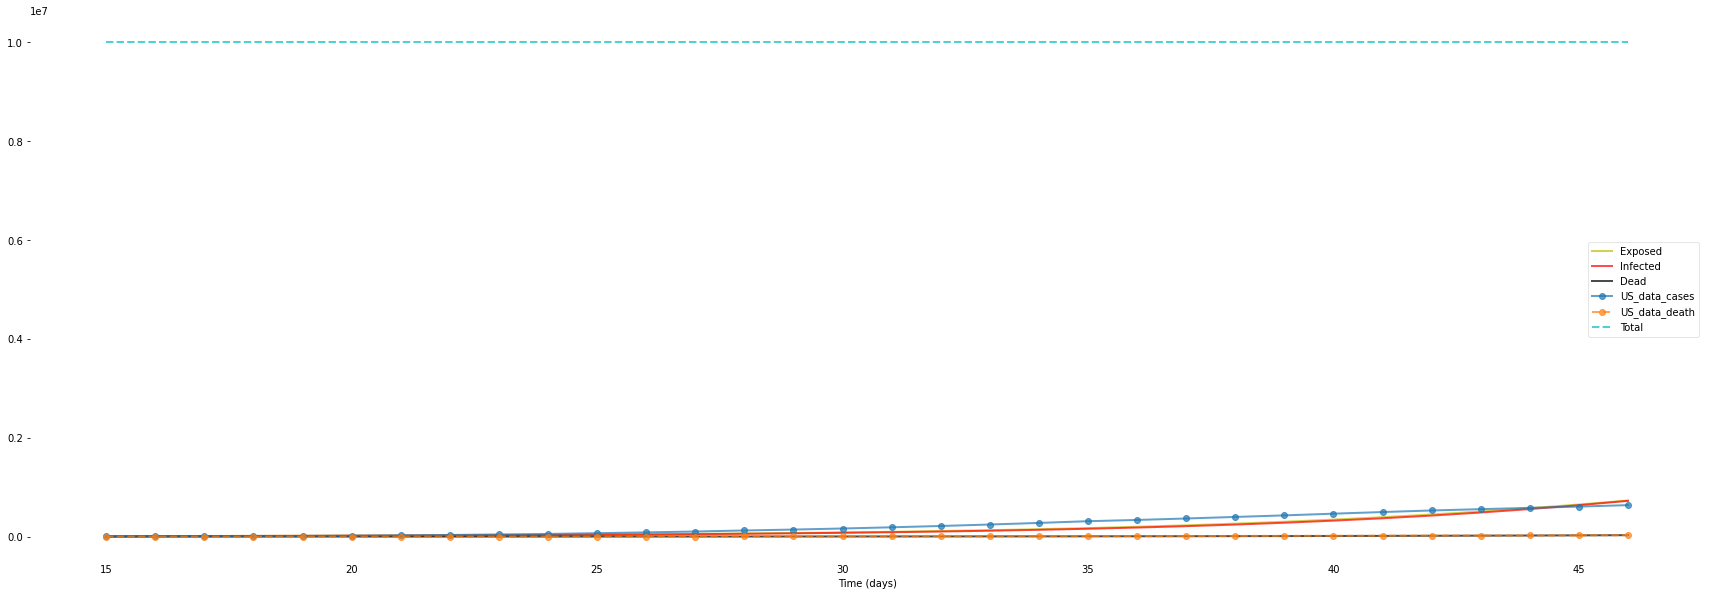

In [385]:
  f, ax = plt.subplots(1,1,figsize=(30,10))
  #ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  #ax.plot(t, C, 'darkmagenta', alpha=0.7, linewidth=2, label='Carrier')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  #ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax.plot(t[0:us_data.shape[0]], us_data['cases'], 'o-', alpha=0.7, linewidth=2, label='US_data_cases')
  ax.plot(t[0:us_data.shape[0]], us_data['deaths'], 'o--', alpha=0.7, linewidth=2, label='US_data_death')

  ax.plot(t, S+E+C+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')

  #ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();
  


In [386]:
I[-1]

723448.836842878

In [0]:
a2 = m + y0 + n + [us_data.iloc[-1,0]] + [I[-1]]
b2 = pd.Series(a2, index = xl_sheet_variation2.columns)
xl_sheet_variation2 = xl_sheet_variation2.append(b2,ignore_index=True)
xl_sheet_variation2.to_excel('/content/xl_sheet_variation2.xlsx',sheet_name='USA',index = False)

In [388]:
xl_sheet_variation2

,N,beta,delta,phi,epsilon,gamma,alpha,rho,lambda1,omega,R_0,S0,E0,C0,I0,R0,D0,S,E,C,I,R,D,actual value,predicted value
0,10000000.0,0.400000,0.2,0.200000,0.90,0.040000,0.90,0.111111,0.142857,4.0,10.00,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,7.125032e+06,1.181136e+06,5551.913505,1.285449e+06,309190.325046,93709.423142,636776.0,1.285449e+06
1,10000000.0,0.428571,0.2,0.200000,0.90,0.071429,0.90,0.111111,0.142857,4.0,6.00,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,7.481114e+06,1.017729e+06,4784.367562,9.839509e+05,437666.637063,74823.238725,636776.0,9.839509e+05
2,10000000.0,0.428571,0.2,0.200000,0.90,0.071429,0.90,0.111111,0.142857,1.0,6.00,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,7.719657e+06,9.234599e+05,14651.456801,8.745370e+05,401077.302857,66685.564365,636776.0,8.745370e+05
3,10000000.0,0.428571,0.2,0.125000,0.90,0.071429,0.90,0.111111,0.142857,1.0,6.00,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,7.785734e+06,9.162830e+05,9081.950658,8.418921e+05,382600.913758,64475.844839,636776.0,8.418921e+05
4,10000000.0,0.428571,0.2,0.200000,0.90,0.071429,0.90,0.111111,0.142857,1.0,6.00,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,7.719657e+06,9.234599e+05,14651.456801,8.745370e+05,401077.302857,66685.564365,636776.0,8.745370e+05
5,10000000.0,0.428571,0.2,0.125000,0.90,0.071429,0.90,0.111111,0.142857,2.0,6.00,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,7.669448e+06,9.627868e+05,5330.299736,8.930457e+05,401079.905351,68377.300071,636776.0,8.930457e+05
6,10000000.0,0.407143,0.2,0.125000,0.90,0.071429,0.90,0.111111,0.142857,2.0,5.70,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.040504e+06,8.002914e+05,4428.505665,7.493280e+05,346437.356009,59078.567729,636776.0,7.493280e+05
7,10000000.0,0.380000,0.2,0.125000,0.90,0.066667,0.90,0.111111,0.142857,2.0,5.70,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.357537e+06,6.620270e+05,3663.134857,6.402015e+05,284653.503728,51986.017847,636776.0,6.402015e+05
8,10000000.0,0.380000,0.2,0.125000,0.95,0.066667,0.90,0.111111,0.142857,2.0,5.70,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.289988e+06,6.837227e+05,1891.559159,6.745680e+05,295538.703385,54358.884274,636776.0,6.745680e+05
9,10000000.0,0.380000,0.2,0.166667,0.95,0.066667,0.90,0.111111,0.142857,2.0,5.70,9981400.0,10000.0,5000.0,3600.0,0.0,68.0,8.271658e+06,6.872228e+05,2535.036415,6.839234e+05,299722.395357,55006.121192,636776.0,6.839234e+05
